<a href="https://www.kaggle.com/prithasarkar1000/friends-episode-data-analysis?scriptVersionId=85393265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/friends-episode-data/friends_episodes.csv
/kaggle/input/friends-episode-data/friends_imdb.csv


### Load and Merge the episode data and IMDb ratings files
A short example notebook to show how to load and merge the data from the two files in the Friends dataset. The common columns are Title and Air Date.

In [2]:
episodes_df = pd.read_csv('/kaggle/input/friends-episode-data/friends_episodes.csv',
                          parse_dates=['original_air_date'])
imdb_df = pd.read_csv('/kaggle/input/friends-episode-data/friends_imdb.csv',
                      parse_dates=['original_air_date'])

episodes_df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,1994-09-22,456650,21500000.0
1,1,2,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,456652,20200000.0
2,1,3,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,456651,19500000.0
3,1,4,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,456654,19700000.0
4,1,5,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,456653,18600000.0


In [3]:
# Only keep relevant columns from the IMDb dataset to avoid duplication.
imdb_df = imdb_df[['title', 'original_air_date', 'imdb_rating', 'total_votes', 'desc']]

friends_df = episodes_df.merge(imdb_df, how='left', on=['title', 'original_air_date'])

friends_df.dropna(inplace=True) # remove rows with missing IMDb ratings
friends_df.head()
friends_df.tail()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,total_votes,desc
231,10,14,232,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2004-02-26,176263,22820000.0,8.6,3953,When Phoebe goes to get her name changed she r...
232,10,15,233,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,2004-04-22,176264,22640000.0,8.5,3700,Ross tries to get Rachel to go back to Ralph L...
233,10,16,234,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,2004-04-29,176265,24510000.0,8.9,4290,"The gang throws Rachel a goodbye party, during..."
234,10,17,235,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0,9.7,14033,Phoebe races Ross to the airport in a bid to s...
235,10,18,236,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176267,52460000.0,9.7,14033,Phoebe races Ross to the airport in a bid to s...


In [4]:
friends_df.drop(friends_df.tail(1).index, inplace=True)

In [5]:
friends_df.tail()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,total_votes,desc
230,10,13,231,The One Where Joey Speaks French,Gary Halvorson,Sherry Bilsing-Graham & Ellen Plummer,2004-02-19,176261,24270000.0,8.5,4054,Phoebe tries to teach Joey to speak French for...
231,10,14,232,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2004-02-26,176263,22820000.0,8.6,3953,When Phoebe goes to get her name changed she r...
232,10,15,233,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,2004-04-22,176264,22640000.0,8.5,3700,Ross tries to get Rachel to go back to Ralph L...
233,10,16,234,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,2004-04-29,176265,24510000.0,8.9,4290,"The gang throws Rachel a goodbye party, during..."
234,10,17,235,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0,9.7,14033,Phoebe races Ross to the airport in a bid to s...


Now that we have a merged version of this data, let's ask some interesting questions and try to find answers to them.

# Popularity of the seasons

Now let's look at the most popular and least popular episodes.

In [6]:
friends_df.tail(5)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,total_votes,desc
230,10,13,231,The One Where Joey Speaks French,Gary Halvorson,Sherry Bilsing-Graham & Ellen Plummer,2004-02-19,176261,24270000.0,8.5,4054,Phoebe tries to teach Joey to speak French for...
231,10,14,232,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2004-02-26,176263,22820000.0,8.6,3953,When Phoebe goes to get her name changed she r...
232,10,15,233,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,2004-04-22,176264,22640000.0,8.5,3700,Ross tries to get Rachel to go back to Ralph L...
233,10,16,234,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,2004-04-29,176265,24510000.0,8.9,4290,"The gang throws Rachel a goodbye party, during..."
234,10,17,235,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0,9.7,14033,Phoebe races Ross to the airport in a bid to s...


In [7]:
friends_df.sort_values(by='imdb_rating', ascending = False, inplace=True)

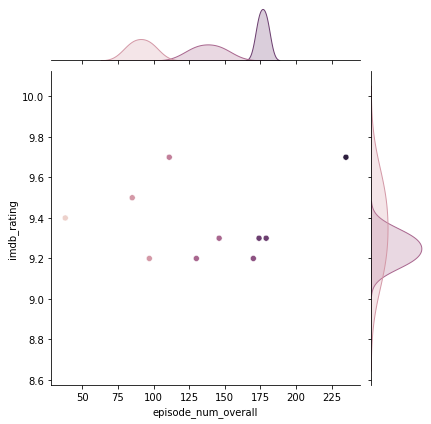

In [8]:
friends_df.head(10)
sns.jointplot(data=friends_df.head(10), x="episode_num_overall", y="imdb_rating",
              kind="scatter", hue='season', height=6, legend= False)

In [9]:
friends_df.head(10)['directed_by']

234    Kevin S. Bright
110    Michael Lembeck
84     Kevin S. Bright
37       James Burrows
145    Kevin S. Bright
178     Gary Halvorson
173    Kevin S. Bright
96     Kevin S. Bright
129    Kevin S. Bright
169    Kevin S. Bright
Name: directed_by, dtype: object

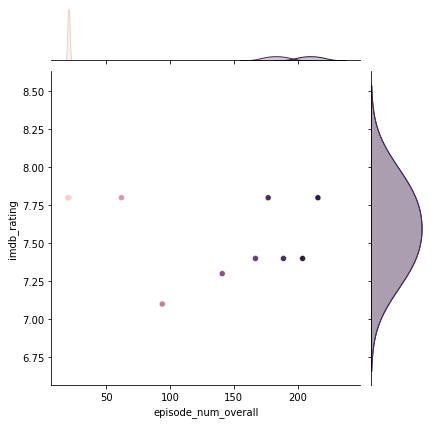

In [10]:
friends_df.tail(10)
sns.jointplot(data=friends_df.tail(10), x="episode_num_overall", y="imdb_rating",
              kind="scatter", hue='season', height=6, legend= False)

In [11]:
friends_df.tail(10)['directed_by']

176    Kevin S. Bright
20        Gail Mancuso
19        Peter Bonerz
61        Robby Benson
215          Ben Weiss
203    Kevin S. Bright
166     Gary Halvorson
188     Gary Halvorson
140    Kevin S. Bright
93        Peter Bonerz
Name: directed_by, dtype: object

Welp! Seems like Mr. Kevin S. Bright was responsible for some of the most popular and for some of the least popular episodes.

# Which friend was the most popular?

In [12]:
friends=["Ross", "Rachel", "Phoebe", "Joey", "Monica", "Chandler"]

for name in friends:
    friends_df[name]=np.where(friends_df["desc"].str.contains(name), 1, 0)

friends_df.T

,234,110,84,37,145,178,173,96,129,169,...,176,20,19,61,215,203,166,188,140,93
season,10,5,4,2,6,8,8,4,6,7,...,8,1,1,3,9,9,7,8,6,4
episode_num_in_season,17,14,12,14,25,9,4,24,9,24,...,7,21,20,14,22,10,21,19,20,21
episode_num_overall,235,111,85,38,146,179,174,97,130,170,...,177,21,20,62,216,204,167,189,141,94
title,The Last One,The One Where Everybody Finds Out,The One with the Embryos,The One with the Prom Video,The One with the Proposal: Part 2,The One with the Rumor,The One with the Videotape,The One with Ross's Wedding: Part 2,The One Where Ross Got High,The One with Monica and Chandler's Wedding: Pa...,...,The One with the Stain,The One with the Fake Monica,The One with the Evil Orthodontist,The One with Phoebe's Ex-Partner,The One with the Donor,The One with Christmas in Tulsa,The One with the Vows,The One with Joey's Interview,The One with Mac and C.H.E.E.S.E.,The One with the Invitation
directed_by,Kevin S. Bright,Michael Lembeck,Kevin S. Bright,James Burrows,Kevin S. Bright,Gary Halvorson,Kevin S. Bright,Kevin S. Bright,Kevin S. Bright,Kevin S. Bright,...,Kevin S. Bright,Gail Mancuso,Peter Bonerz,Robby Benson,Ben Weiss,Kevin S. Bright,Gary Halvorson,Gary Halvorson,Kevin S. Bright,Peter Bonerz
written_by,Marta Kauffman & David Crane,Alexa Junge,Jill Condon & Amy Toomin,Alexa Junge,Andrew Reich & Ted Cohen,Shana Goldberg-Meehan,Scott Silveri,Story by: Jill Condon & Amy Toomin Teleplay by...,Gregory S. Malins,Marta Kauffman & David Crane,...,R. Lee Fleming Jr.,Adam Chase & Ira Ungerleider,Doty Abrams,Wil Calhoun,Andrew Reich & Ted Cohen,Doty Abrams,Doty Abrams,Doty Abrams,Doty Abrams,Seth Kurland
original_air_date,2004-05-06 00:00:00,1999-02-11 00:00:00,1998-01-15 00:00:00,1996-02-01 00:00:00,2000-05-18 00:00:00,2001-11-22 00:00:00,2001-10-18 00:00:00,1998-05-07 00:00:00,1999-11-25 00:00:00,2001-05-17 00:00:00,...,2001-11-08 00:00:00,1995-04-27 00:00:00,1995-04-06 00:00:00,1997-02-06 00:00:00,2003-05-08 00:00:00,2002-12-12 00:00:00,2001-05-03 00:00:00,2002-04-04 00:00:00,2000-04-13 00:00:00,1998-04-23 00:00:00
prod_code,176266,467664,466611,457310,225574,227410,227406,466624,225559,226423,...,227407,456671,456669,465266,175272,175260,226424,227424,225575,466619
us_viewers,52460000.0,27700000.0,27140000.0,33600000.0,30730000.0,24240000.0,25580000.0,31610000.0,19170000.0,30050000.0,...,24240000.0,28400000.0,30000000.0,28910000.0,19550000.0,22280000.0,15650000.0,22590000.0,18810000.0,21510000.0
imdb_rating,9.7,9.7,9.5,9.4,9.3,9.3,9.3,9.2,9.2,9.2,...,7.8,7.8,7.8,7.8,7.8,7.4,7.4,7.4,7.3,7.1


<AxesSubplot:>

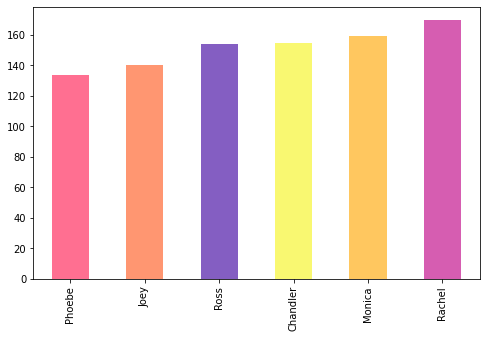

In [13]:
friends_color = {'Ross':'#845EC2', 'Rachel':'#D65DB1', 'Phoebe':'#FF6F91',
                'Joey': '#FF9671', 'Monica':'#FFC75F', 'Chandler': '#F9F871'}

friends_total = friends_df[friends].sum().sort_values()

colors = [friends_color[c] for c in friends_total.index]

friends_total.plot.bar(figsize=(8,5), color = colors)

Seems like the entire show revolves around Rachel. However, the others aren't far behind. 
Let's see what's the stat of each friend for the top 10 and bottom 10 episodes.

<AxesSubplot:>

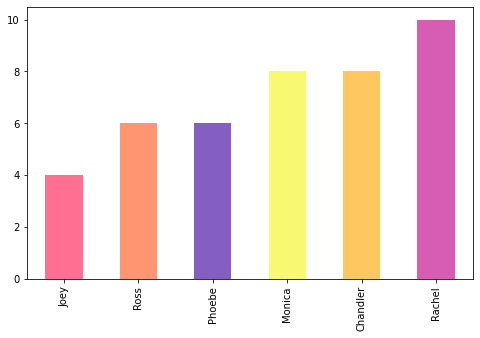

In [14]:
friends_total_top10 = friends_df[friends].head(10).sum().sort_values()

friends_total_top10.plot.bar(figsize=(8,5), color = colors)

<AxesSubplot:>

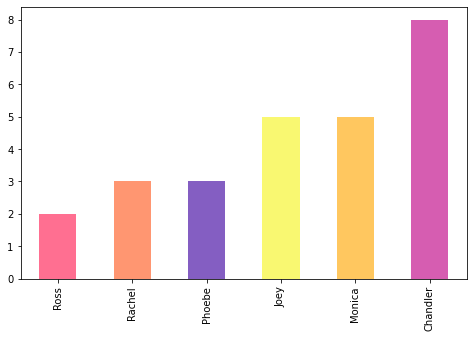

In [15]:
friends_total_bottom10 = friends_df[friends].tail(10).sum().sort_values()

friends_total_bottom10.plot.bar(figsize=(8,5), color = colors)

Ouch! Chandler taking the hit!